# **ANALYSIS OF AIRBNB LISTINGS IN BANGKOK (2012-2022)**
As part of the capstone project at Purwadhika BSD, I was tasked with assessing my data analysis skills by analyzing Airbnb listing data for the period 2012-2022.

My first step was to understand the dataset to:

1. Identify stakeholders to whom I will present my analysis.
2. Identify the issues these stakeholders face.
3. Formulate preliminary hypotheses that might address these issues.
4. Provide evidence as to whether these hypotheses are supported by the data.

The explanations for the Airbnb dataset are as follows:

- id = Unique identifier for the listing on Airbnb.
- name = Name of the listing.
- host_id = Unique identifier for the host/user on Airbnb.
- host_name = The neighborhood is geocoded using latitude and longitude against neighborhoods defined by open or public digital shapefiles.
- Latitude = Latitude coordinate using the World Geodetic System (WGS84) projection.
- Longitude = Longitude coordinate using the World Geodetic System (WGS84) projection.
- Room_type = Type of room: Entire home/apt, Private room, Shared room, Hotel.
- Price = Daily price in local currency. Note: The $ sign may be used despite the locale.
- minimum_nights = The minimum number of nights required for the listing (calendar rules may differ).
- number_of_reviews = The number of reviews the listing has.
- last_review = The date of the last/newest review.
- calculated_host_listings_count = The number of listings the host has in the current scrape in the city/region geography.
- availability_365 = Availability_x. The calendar determines the availability of the listing x days in the future. Note: A listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm = The number of reviews the listing has (in the last 12 months).

After conducting basic analyses to understand the data, here is the context I developed.

**Objective of Analysis**

The objective of this analysis is to provide insights to listing owners, known as hosts, both those who are already operational and those considering starting operations. This is because I aim to provide reviews to hosts to improve the two most important aspects: sales and profits.

**Problem Statement & Provisional Hypotheses**

When discussing sales and profits, it is closely related to traffic and determining the optimal price. Therefore, I formulated several problems to be developed into questions to assist in data exploration.

A. Sales Improvement -> Traffic

   What makes customers choose a particular listing over others?
   In exploring this analysis, I use the key metric in the availability 365 column. This is because the lower the availability value, the more bookings a listing has, and vice versa.


B. Optimal Profit -> Price

   What is the optimal price that hosts can set, attracting interest while still generating profits?
   In exploring this analysis, I use the key metric of price. This is because the higher the price, the fewer customers want to book, and vice versa.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## **1. DATA PREPROCESSING**

In [3]:
df= pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

This Airbnb dataset consists of 15,854 rows and 17 columns

In [6]:
print(df['neighbourhood'].unique())

['Ratchathewi' 'Bang Na' 'Bang Kapi' 'Din Daeng' 'Bang Kho laen'
 'Rat Burana' 'Chatu Chak' 'Khlong San' 'Bang Rak' 'Phaya Thai' 'Sathon'
 'Khlong Toei' 'Vadhana' 'Sai Mai' 'Lat Krabang' 'Bangkok Yai'
 'Wang Thong Lang' 'Huai Khwang' 'Phasi Charoen' 'Bang Sue' 'Nong Chok'
 'Phra Khanong' 'Thawi Watthana' 'Parthum Wan' 'Pra Wet' 'Phra Nakhon'
 'Thon buri' 'Yan na wa' 'Suanluang' 'Don Mueang' 'Dusit' 'Lak Si'
 'Samphanthawong' 'Bueng Kum' 'Bang Phlat' 'Saphan Sung' 'Min Buri'
 'Khan Na Yao' 'Khlong Sam Wa' 'Bang Khen' 'Lat Phrao' 'Chom Thong'
 'Bangkok Noi' 'Pom Prap Sattru Phai' 'Nong Khaem' 'Thung khru'
 'Bang Khae' 'Bang Khun thain' 'Taling Chan' 'Bang Bon']


In [7]:
df['last_review'] = pd.to_datetime(df['last_review']).dt.date


In [8]:
df.describe()

Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

In [9]:
df[df['price']==df['price'].min() ]

Unnamed: 0        id                           name    host_id  \
11103       11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

From the description results, I found that the lowest value in the price column is 0, which is not possible. Therefore, I proceeded to remove this data.

In [10]:
# Delete row that price is zero 
df.drop(index=11103,inplace= True)

### **1.1 Find duplicates**
There are no duplicate data entries.

In [11]:
df.duplicated().sum()

0

### **1.2 Drop unnecessary column**

In [12]:
df.drop(columns=['Unnamed: 0','id','host_id'],inplace=True)


I dropped this column because it has no relation to the dataset. Additionally, there is no mention of this column in Airbnb's documentation.

### **1.3 Missing Values**

In [13]:
df.isna().sum()

name                                 8
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5789
reviews_per_month                 5789
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


From the results above, there are 4 columns with missing values:
1. Name
2. Host_name
3. Last_review
4. Reviews_per_month

Initially, I examined the columns with missing values in the dataset. Most of them couldn't be tracked to provide clues on how to fill the missing values. However, for the 'Name' column, I found one data entry that gave me an opportunity to make a better guess. This entry belonged to a listing where the host's name is Pakaphol.

I identified this by examining the 'calculated_host_listings_count' column, which indicated that this host had other listings in different locations. Upon further investigation, I discovered another data entry with the same host name, and both listings had the same name: Errday Guest House.

Therefore, for the 'Name' column corresponding to listings belonging to Pakaphol, I filled the missing values with 'Errday Guest House'.

In [14]:
df[df['host_name']=='Pakaphol']

name host_name neighbourhood  latitude  longitude  \
1981  Errday Guest House  Pakaphol   Khlong Toei  13.72427  100.56443   
1982  Errday Guest House  Pakaphol   Khlong Toei  13.72373  100.56415   
2075                 NaN  Pakaphol   Khlong Toei  13.72566  100.56416   

         room_type  price  minimum_nights  number_of_reviews last_review  \
1981  Private room    950               1                  1  2020-02-19   
1982  Private room  36363               1                  0         NaT   
2075  Private room    850               1                  2  2017-12-11   

      reviews_per_month  calculated_host_listings_count  availability_365  \
1981               0.03                               3                 1   
1982                NaN                               3                 1   
2075               0.03                               3               220   

      number_of_reviews_ltm  
1981                      0  
1982                      0  
2075                      0

In [15]:
df.loc[2075,'name'] = 'Errday Guest House'
df.loc[2075,'name']

'Errday Guest House'

For the other data, I filled in the missing values as mentioned below.

In [16]:
df.fillna({'name':'Noname'},inplace=True)
df.fillna({'host_name':'NoName'},inplace=True)
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'last_review':0},inplace=True)

In [17]:
df.isna().sum()

name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [18]:
df.shape

(15853, 14)

### **1.4 Define & delete outlier**


To start this process, I examined the histogram of the price. I chose this column because 'price' is highly likely to be influenced by other variables. However, for other numeric columns like reviews, I understand that they are more likely to be independent variables.

<function matplotlib.pyplot.show(close=None, block=None)>

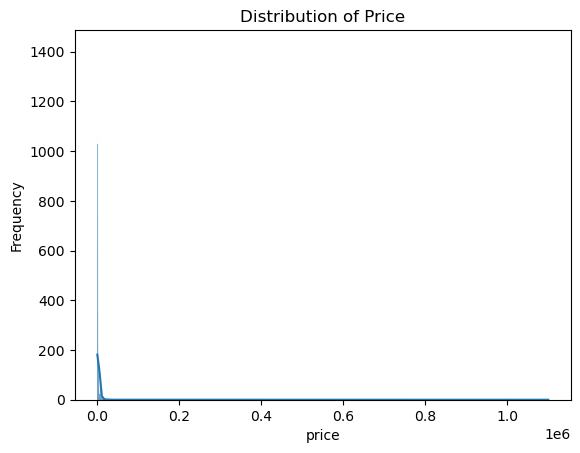

In [19]:

sns.histplot(data=df, x='price',kde=True);

plt.title('Distribution of Price')

plt.ylabel('Frequency')
plt.show

In [20]:
df.describe()

latitude     longitude         price  minimum_nights  \
count  15853.000000  15853.000000  1.585300e+04    15853.000000   
mean      13.745144    100.559903  3.217907e+03       15.293257   
std        0.043041      0.050912  2.497290e+04       50.816496   
min       13.527300    100.329550  2.780000e+02        1.000000   
25%       13.720090    100.529690  9.000000e+02        1.000000   
50%       13.738490    100.561410  1.429000e+03        1.000000   
75%       13.759500    100.585150  2.429000e+03        7.000000   
max       13.953540    100.923440  1.100000e+06     1125.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       15853.000000       15853.000000                    15853.000000   
mean           16.655207           0.516211                       13.890431   
std            40.614397           0.952774                       30.270630   
min             0.000000           0.000000                        1.000000   
25%             0.000000           0.000000                        1.000000   
50%             2.000000           0.090000                        4.000000   
75%            13.000000           0.670000                       13.000000   
max          1224.000000          19.130000                      228.000000   

       availability_365  number_of_reviews_ltm  
count      15853.000000           15853.000000  
mean         244.394058               3.481738  
std          125.832224               8.917176  
min            0.000000               0.000000  
25%          138.000000               0.000000  
50%          309.000000               0.000000  
75%          360.000000               3.000000  
max          365.000000             325.000000

The graph above indicates that the price distribution is not normal. It's also challenging to identify the price range due to its wide variability. As seen in the description, the minimum price is 2.780000e+02 and the maximum price is 1.100000e+06.

<function matplotlib.pyplot.legend(*args, **kwargs)>

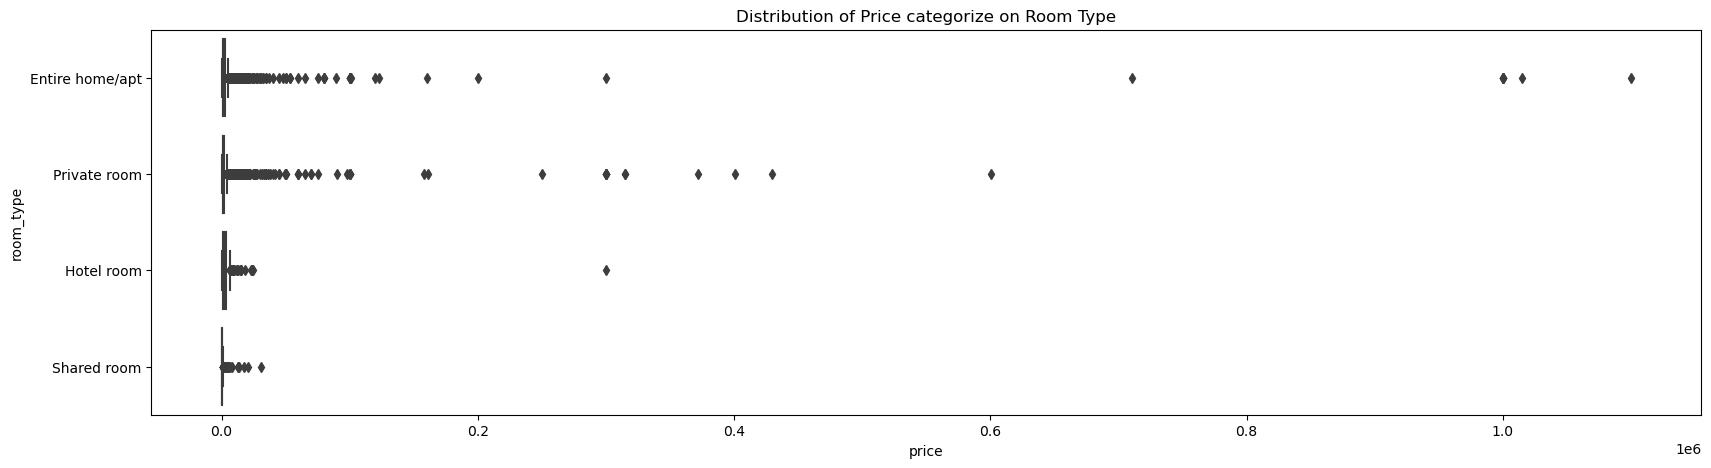

In [21]:
plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend

The graph above shows that the price distribution for each room_type is not normal. The highest outlier corresponds to hosts offering entire home/apartment.

For further analysis, I propose the following approach:

- Popular: Focus on listings that have been reviewed. Delete entries where the value of the 'number_of_reviews' column is 0.
- Affordability: Considering the limited number of outliers with high prices, leading to skewed data, I intend to delete entries above the median upper bound of price.

In [22]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

# Identify listings above the upper bound
df_upperBound = df[df['price'] > Q3 + 1.5 * IQR]

# Print information about upper bound listings
print(f'Number of listings in upper bound: {len(df_upperBound)}')
print(f"Median price of data in upper bound: {df_upperBound['price'].median()}")
print(f"Number of data that exceed the median value: {len(df_upperBound[df_upperBound['price'] > df_upperBound['price'].median()])}")


Number of listings in upper bound: 1403
Median price of data in upper bound: 7340.0
Number of data that exceed the median value: 701


In [23]:
# Delete the outliers 
# First i delete the data that has zero reviews
df_clean = df.drop(df[df['number_of_reviews'] == 0].index)

# Second i delete the data that exceed the median value
df_clean = df_clean.drop(df_clean[df_clean['price'] > 7340].index)
len(df_clean)


9721

C:\Users\Intania\AppData\Local\Temp\ipykernel_11076\2451311764.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)


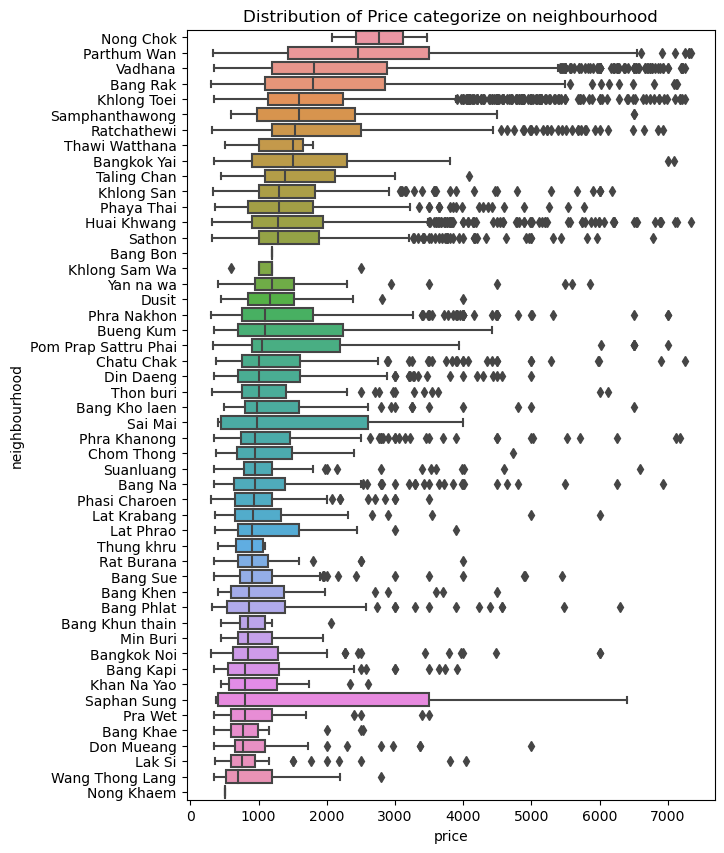

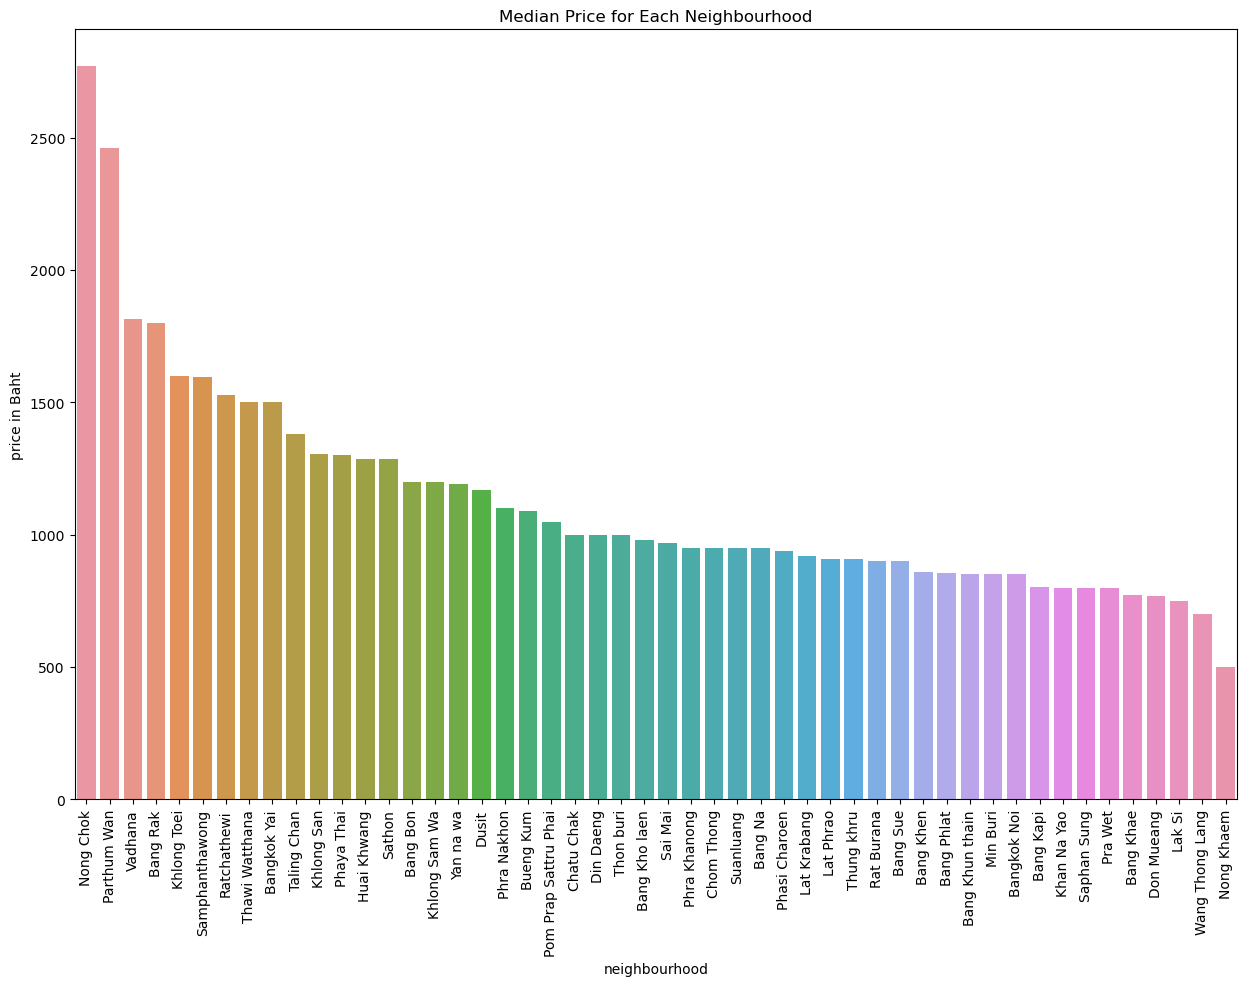

In [24]:

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
median_prices = df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create boxplot 
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'neighbourhood',
            order=median_prices.index
            )   

# Add title to the graph
plt.title('Distribution of Price categorize on neighbourhood')

# -------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 10))
sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Median Price for Each Neighbourhood')
plt.ylabel('price in Baht')
plt.show()


From the graph above, here are the insights we can gather:
1. Nong Chok neighborhood exhibits a normal distribution of prices.
2. The top 3 neighborhoods with the highest price range are Saphan Sung, Parthum Wan, and Vadhana.
3. Conversely, the top 3 neighborhoods with the lowest price range are Khlong Sam Wa, Bang Khut Tain, and Thung Kru.
4. The top 5 neighborhoods with a significant number of outliers are Vadhana, Khlong Toei, Ratchathewi, Huai Khwang, and Sathon.
5. The top 3 neighborhoods with the highest median price are Nong Chok, Parthum Wan, and Vadhana.
6. In contrast, the top 3 neighborhoods with the lowest median price are Nong Khaem, Wang Thong Lang, and Lak Si.
7. All neighborhoods have a median price above 500 baht.
8. The majority of neighborhoods fall within the price range of 500 - 1200 Baht.

In [ ]:
df_clean['number_of_reviews'].corr(df_clean['reviews_per_month'])

0.512193848244016

In [ ]:
df_clean.groupby('neighbourhood')[['number_of_reviews']].sum().sort_values(by='number_of_reviews', ascending=False)

number_of_reviews
neighbourhood                          
Khlong Toei                       40297
Vadhana                           35737
Sathon                            21716
Ratchathewi                       20503
Huai Khwang                       17415
Bang Rak                          17346
Phaya Thai                        13468
Phra Nakhon                        8127
Chatu Chak                         8093
Parthum Wan                        7887
Din Daeng                          6914
Khlong San                         6760
Phra Khanong                       6100
Bang Na                            5512
Pom Prap Sattru Phai               4022
Suanluang                          3989
Bang Sue                           3968
Thon buri                          3450
Yan na wa                          2852
Lat Krabang                        2675
Bang Kho laen                      2613
Don Mueang                         2510
Bang Kapi                          1814
Lak Si                             1755
Pra Wet                            1478
Phasi Charoen                      1431
Samphanthawong                     1241
Chom Thong                         1040
Bang Phlat                          880
Bangkok Noi                         854
Dusit                               793
Bangkok Yai                         715
Bang Khen                           691
Rat Burana                          674
Bueng Kum                           311
Khan Na Yao                         267
Bang Khae                           159
Wang Thong Lang                     158
Min Buri                            147
Lat Phrao                           134
Saphan Sung                         132
Bang Khun thain                     101
Taling Chan                          45
Khlong Sam Wa                        41
Sai Mai                              22
Thung khru                           22
Thawi Watthana                       11
Nong Chok                             2
Nong Khaem                            1
Bang Bon                              1

After examining the graph, I looked at the total number of reviews for each neighborhood. Interestingly, neighborhoods with a high range and variance in prices are among the top 5 based on the total number of reviews.

<function matplotlib.pyplot.legend(*args, **kwargs)>

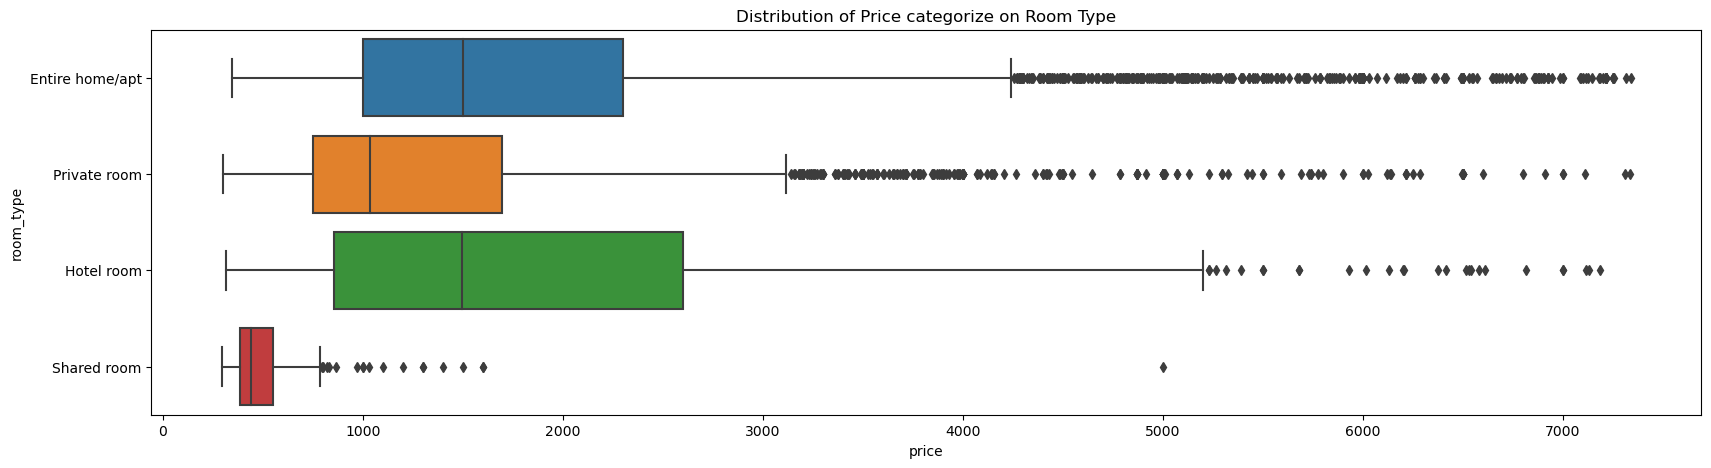

In [ ]:
plt.figure(figsize=(20,5))

#  Create boxplot
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'room_type'
            )   

# Add title
plt.title('Distribution of Price categorize on Room Type')

# Show Legend
plt.legend


C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\4064769219.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='room_type', y='price', ci=0, estimator='median', order=median_prices.index)


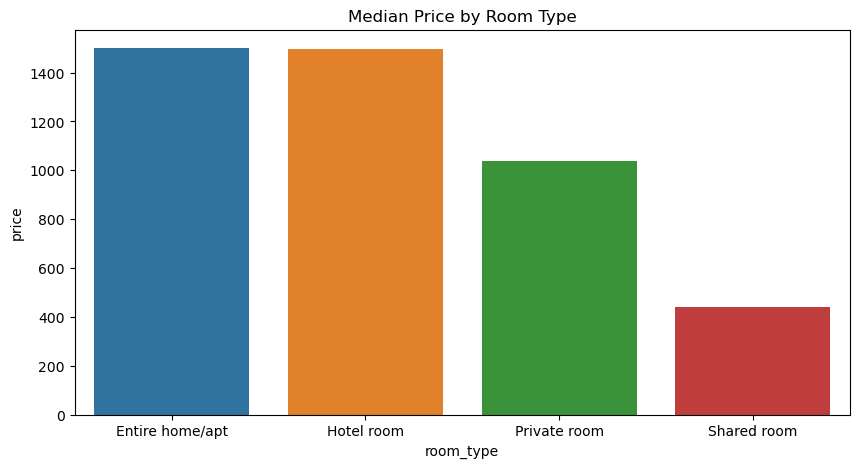

In [ ]:
# Calculate median price for each room type
median_prices = df_clean.groupby('room_type')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_clean, x='room_type', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)

plt.title('Median Price by Room Type')
plt.show()


From the graph above 
1. Hotel rooms have the highest range and upper bound value. This could be due to the brand of the hotel, especially luxury ones.
2. Interestingly, the median price of entire home/apartment and hotel rooms is the same at 1400.
3. Entire home/apartments have a lot of outliers, which may be attributed to the size of the apartment and its location. This is evident in popular neighborhoods where many data points exceed their upper bounds.
4. The cheapest room type is a shared room.

In [ ]:
df_clean.to_excel('Airbnb_Clean_Data.xlsx')

In [37]:
df_clean.to_csv('AirbnbCleanData.csv')

In [ ]:
df_clean.shape

(9721, 14)

## **2. EXPLORATORY DATA ANALYSIS**

### **2.1. ANALYSIS OF POPULARITY FOR BETTER SALES IMPROVEMENT**

If we are discussing sales, it won't be far removed from traffic and customer behavior.

Question:<br>
**What are the factors that influence customers to choose one listing over another?**

Our basic assumption is that customers choose based on location, price, and popularity.

For this analysis, I chose a key metric from the 'availability_365' column. This column defines the availability of the listing, where a lower number indicates more bookings already made, and vice versa.

I also obtained additional data called 'review.csv'. This dataset compiles reviews from various visitors. I extracted this data to determine the most frequently mentioned words in their reviews, aiming to identify crucial keywords.

In [30]:
from collections import Counter
import re

# Read the CSV file into a DataFrame
df_reviews = pd.read_csv('reviews.csv')

# Convert all values in the 'review' column to strings
df_reviews['comments'] = df_reviews['comments'].astype(str)

# Concatenate all reviews into a single string
all_reviews_text = ' '.join(df_reviews['comments'])

# Tokenize the text by splitting it into words
words = re.findall(r'\b\w+\b', all_reviews_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get 100 most common words
most_common_words = word_counts.most_common(100)  

print("Most common keywords:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")


Most common keywords:
the: 626074 occurrences
and: 516694 occurrences
to: 353155 occurrences
a: 313756 occurrences
is: 283295 occurrences
was: 213046 occurrences
br: 208676 occurrences
in: 197328 occurrences
very: 180731 occurrences
i: 151908 occurrences
place: 147028 occurrences
for: 143867 occurrences
it: 138926 occurrences
of: 125236 occurrences
great: 123432 occurrences
stay: 119340 occurrences
you: 112037 occurrences
we: 111589 occurrences
with: 99519 occurrences
s: 83813 occurrences
location: 80970 occurrences
clean: 80071 occurrences
good: 79273 occurrences
nice: 78069 occurrences
host: 73526 occurrences
this: 70917 occurrences
apartment: 66300 occurrences
there: 63464 occurrences
at: 62773 occurrences
but: 60359 occurrences
bangkok: 59898 occurrences
from: 57007 occurrences
room: 56769 occurrences
as: 56393 occurrences
are: 56296 occurrences
so: 53798 occurrences
that: 50157 occurrences
on: 49214 occurrences
had: 46913 occurrences
my: 45875 occurrences
all: 45383 occurrences
bt

In [31]:
len(df_reviews)

372461

I extracted the 100 most mentioned words and identified these crucial keywords:<br>
Location: close, station, walk, convenient, near <br>
Cleanliness: cleanliness, comfortable <br>
Host: helpful, friendly, responsive <br>


From these frequently mentioned keywords, it's evident that the primary reasons people choose a listing are based on location, the quality of the accommodation, and the performance of the host.

In [ ]:
df_clean.head()

name host_name  neighbourhood  \
0                 Nice room with superb city view    Nuttee    Ratchathewi   
3  Spacious one bedroom at The Kris Condo Bldg. 3   Sirilak      Din Daeng   
5                  NEw Pro!!  Bungalow Bkk Centre  Wimonpak  Bang Kho laen   
6                 Condo with Chaopraya River View  Athitaya     Rat Burana   
8              Batcave, Pool view, near Chatuchak       Nol     Chatu Chak   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   
3  13.78823  100.57256     Private room   1286               7   
5  13.69757  100.52880  Entire home/apt   1000             250   
6  13.68556  100.49535     Private room   1558               3   
8  13.81693  100.56433  Entire home/apt   1558               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
3                  2  2022-04-01               0.03   
5                 19  2017-08-03               0.17   
6                  1  2014-02-03               0.01   
8                 10  2016-03-29               0.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
3                               1               323                      1  
5                              41               365                      0  
6                               1               365                      0  
8                               1               365                      0

In [ ]:
df_clean.groupby('availability_365')['name'].count()

availability_365
0      576
1       34
2       12
3        4
4        8
      ... 
361    193
362    146
363    130
364    333
365    650
Name: name, Length: 366, dtype: int64

After that, I need to categorize the listings by dividing them into groups by column availability_365

In [ ]:
# Make groups based on the number of availability 
def popularity(availability):
    if availability in range(0, 91):
        return 'Very Popular'
    elif availability in range(91, 181):
        return 'Popular'
    elif availability in range(181, 271):
        return 'Neutral'
    elif availability in range(271, 366):
        return 'Not Popular'

# Make additional column 
df_clean['popularity'] = df_clean['availability_365'].apply(popularity)


In [ ]:
# Create dataFrame for each group 

avail_0_90 = []
avail_91_180 = []
avail_181_270 = []
avail_271_365 = []

for index, row in df_clean.iterrows():
    availability = row['availability_365']
    if availability in range(0, 91):
        avail_0_90.append(row) 
    elif availability in range(91, 181):
        avail_91_180.append(row)
    elif availability in range(181, 271):
        avail_181_270.append(row)
    elif availability in range(271, 366):
        avail_271_365.append(row)

avail_0_90_df = pd.DataFrame(avail_0_90)
avail_91_180_df = pd.DataFrame(avail_91_180)
avail_181_270_df = pd.DataFrame(avail_181_270)
avail_271_365_df = pd.DataFrame(avail_271_365)


group_lengths = {
    '0-90': len(avail_0_90_df),
    '91-180': len(avail_91_180_df),
    '181-270': len(avail_181_270_df),
    '271-365': len(avail_271_365_df)
}

group_lengths_df = pd.DataFrame(list(group_lengths.items()), columns=['Availability Group', 'Number of Listings'])

print(group_lengths_df)

  Availability Group  Number of Listings
0               0-90                2085
1             91-180                2013
2            181-270                 713
3            271-365                4910


#### **2.1.1 Categorical vs Categorical Statistic Test** 

After separating the data into four groups based on their popularity, I would like to test if there is any association between each variable. Since there are numerous columns, I've divided them into categorical and numerical variables.

Categorical vs. Categorical Statistical Test:

1. Host Name
2. Neighbourhood
3. Room Type

In [ ]:
from scipy.stats import chi2_contingency

# Define hypothesis testing function
def hypothesis_test(feature):
    df_crosstab = pd.crosstab(df_clean['popularity'], df_clean[feature])
    stats, p_value, dof, _ = chi2_contingency(df_crosstab)
    if p_value > 0.05:
        return stats, p_value, "Accept"
    else:
        return stats, p_value, "Reject"

# Define features to test
features = ['host_name', 'neighbourhood', 'room_type']

# Perform hypothesis testing for each feature
results = []
for feature in features:
    stats, p_value, hypothesis_status = hypothesis_test(feature)
    results.append({'Feature': feature, 'Statistic': stats, 'P-value': p_value, 'Hypothesis': hypothesis_status})

# Sort results based on p-value
ranked_results = sorted(results, key=lambda x: x['P-value'])

# Print results
print("Ranked Features based on Chi-squared Test:")
for rank, result in enumerate(ranked_results, 1):
    print(f"{rank}. {result['Feature']}: Statistic = {result['Statistic']:.4f}, P-value = {result['P-value']:.4f}. {result['Hypothesis']} null hypothesis.")


Ranked Features based on Chi-squared Test:
1. host_name: Statistic = 17854.5735, P-value = 0.0000. Reject null hypothesis.
2. room_type: Statistic = 391.2681, P-value = 0.0000. Reject null hypothesis.
3. neighbourhood: Statistic = 551.4170, P-value = 0.0000. Reject null hypothesis.


First of all, I used the chi-square test because it is the appropriate statistical test for both categorical variables. After running the test, we observed that all features rejected the null hypothesis. Therefore, we can conclude that host_name, neighbourhood, and room_type significantly affect customer decisions.


**Top 5 Host at Bangkok** 

In [ ]:
pd.concat([avail_0_90_df,avail_91_180_df]).groupby(by='host_name')[['name']].count().sort_values(by='name',ascending=False).head(5)

name
host_name      
Curry        58
Mike         49
Ludoping     47
Eva          46
Ken-Bambu    43

In [ ]:
host_popular = ['Curry','Mike','Ludoping','Eva','Ken-Bambu']
df_clean[df_clean['host_name'].isin(host_popular)].groupby(by='host_name')['calculated_host_listings_count'].value_counts()

host_name  calculated_host_listings_count
Curry      228                               217
Eva        44                                 44
           1                                   1
           3                                   1
Ken-Bambu  48                                 43
Ludoping   56                                 50
Mike       49                                 48
           1                                   4
Name: count, dtype: int64

I also ranked the hosts into the top 5 based on the group popularity that I created earlier to strengthen the validity of the statement. I combined two dataframes: one is avail_0_90_df and the other is avail_91_181_df, and we obtained the top 5 hosts.

Later, I investigated the relationship between the top hosts and the column of calculated_listings_count and found that all of the famous hosts have more than 10 listings. This suggests that they may be professionally managed, thereby increasing the reliability of the listings.

In [ ]:
pd.concat([avail_0_90_df,avail_91_180_df]).groupby(by='room_type')[['name']].count().sort_values(by='name',ascending=False)

name
room_type            
Entire home/apt  3022
Private room      901
Hotel room        129
Shared room        46

In terms of room_type, our customers prefer entire home/apt, as it enables them to enjoy the overall space. This is followed by private room, hotel room, and shared room.

In [ ]:
print(df_clean['last_review'].dtype)

object


C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\275706381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['last_review'].dt.year
C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\275706381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['last_review'].dt.month


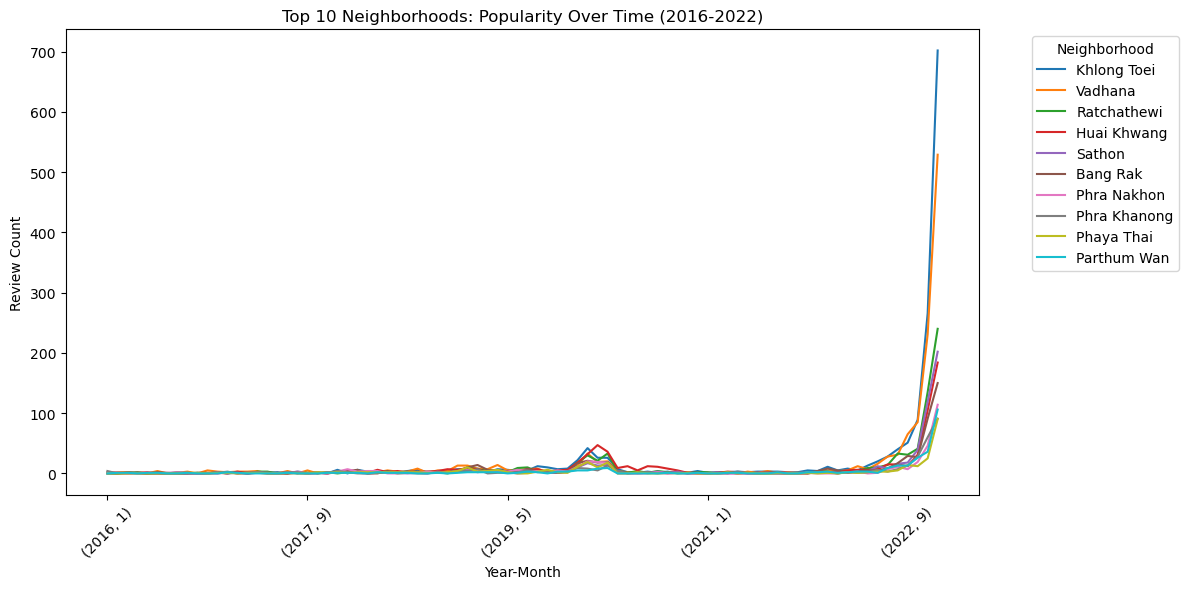

In [ ]:
# Convert 'last_review' column to datetime type
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

# Filter data for the years 2016-2022
df_filtered = df_clean[(df_clean['last_review'].dt.year >= 2016) & (df_clean['last_review'].dt.year <= 2022)]

# Extract year and month from 'last_review' column
df_filtered['year'] = df_filtered['last_review'].dt.year
df_filtered['month'] = df_filtered['last_review'].dt.month

# Group by neighbourhood, year, and month and count the number of reviews
grouped = df_filtered.groupby(['neighbourhood', 'year', 'month']).size().reset_index(name='review_count')

# Get the top 10 neighbourhoods by review count
top_10_neighbourhoods = grouped.groupby('neighbourhood')['review_count'].sum().nlargest(10).index

# Filter data for the top 10 neighbourhoods
grouped_top_10 = grouped[grouped['neighbourhood'].isin(top_10_neighbourhoods)]

# Calculate total number of reviews for each neighbourhood
neighbourhood_review_totals = grouped_top_10.groupby('neighbourhood')['review_count'].sum()

# Sort the columns of the pivot table based on total review counts
pivot_table = grouped_top_10.pivot_table(index=['year', 'month'], columns='neighbourhood', values='review_count', fill_value=0)
pivot_table = pivot_table[neighbourhood_review_totals.sort_values(ascending=False).index]

# Plot the trend for each neighbourhood
pivot_table.plot(figsize=(12, 6), xlabel='Year-Month', ylabel='Review Count', title='Top 10 Neighborhoods: Popularity Over Time (2016-2022)')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The trend graph above indicates that traffic to Bangkok surged significantly after the Covid-19 pandemic. The top five neighborhoods exhibiting the highest exponential growth are Khlong Tei, Vadhana, Ratchathewi, Huai Khwang, and Sathon

In [ ]:
pd.concat([avail_0_90_df,avail_91_180_df]).groupby(by='neighbourhood')[['name']].count().sort_values(by='name',ascending=False).head(10)

name
neighbourhood      
Khlong Toei     704
Vadhana         691
Huai Khwang     405
Ratchathewi     298
Bang Rak        211
Sathon          164
Phra Khanong    147
Phaya Thai      126
Parthum Wan     120
Bang Na         111

From this categorical vs. categorical test, we can conclude that neighborhood, host, and room type have an impact on popularity. The top 10 neighborhoods are mentioned in the pivot table above. Additionally, hosts with multiple listings are more likely to increase traffic due to increased visibility and reliability. Moreover, our customers tend to prefer booking entire apartments for their stay.

#### **2.1.2 Categorical vs Numerical Variable Statistic Test**

After comparing categorical variables, we now move on to numeric vs. numeric variables. In this analysis, I am using the following variables:

1. Price: to understand the distribution of overall prices and compare them with popularity metrics.
2. Minimum_nights: to determine the distribution and preferences of customers regarding short-term or long-term rentals.
3. Number of reviews: to assess whether the number of reviews correlates with popularity.
4. Calculated_host_listings_count: to validate our previous analysis that hosts with more than 10 listings have better popularity than those with fewer than 10.

In [ ]:
df_clean.head()

name host_name  neighbourhood  \
0                 Nice room with superb city view    Nuttee    Ratchathewi   
3  Spacious one bedroom at The Kris Condo Bldg. 3   Sirilak      Din Daeng   
5                  NEw Pro!!  Bungalow Bkk Centre  Wimonpak  Bang Kho laen   
6                 Condo with Chaopraya River View  Athitaya     Rat Burana   
8              Batcave, Pool view, near Chatuchak       Nol     Chatu Chak   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   
3  13.78823  100.57256     Private room   1286               7   
5  13.69757  100.52880  Entire home/apt   1000             250   
6  13.68556  100.49535     Private room   1558               3   
8  13.81693  100.56433  Entire home/apt   1558               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
3                  2  2022-04-01               0.03   
5                 19  2017-08-03               0.17   
6                  1  2014-02-03               0.01   
8                 10  2016-03-29               0.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
3                               1               323                      1   
5                              41               365                      0   
6                               1               365                      0   
8                               1               365                      0   

    popularity  
0  Not Popular  
3  Not Popular  
5  Not Popular  
6  Not Popular  
8  Not Popular

In [ ]:
df_clean_numerik = df_clean.drop(columns=['name','host_name','neighbourhood','latitude','longitude','room_type','last_review','availability_365'])

In [ ]:
df_clean_numerik

price  minimum_nights  number_of_reviews  reviews_per_month  \
0       1905               3                 65               0.50   
3       1286               7                  2               0.03   
5       1000             250                 19               0.17   
6       1558               3                  1               0.01   
8       1558               3                 10               0.09   
...      ...             ...                ...                ...   
15712   2000               1                  1               1.00   
15728   2514               1                  1               1.00   
15743   3932               1                  3               3.00   
15744   4285              28                  3               3.00   
15796   3304               2                  2               2.00   

       calculated_host_listings_count  number_of_reviews_ltm   popularity  
0                                   2                      0  Not Popular  
3                                   1                      1  Not Popular  
5                                  41                      0  Not Popular  
6                                   1                      0  Not Popular  
8                                   1                      0  Not Popular  
...                               ...                    ...          ...  
15712                               2                      1  Not Popular  
15728                               4                      1      Neutral  
15743                               8                      3  Not Popular  
15744                               8                      3  Not Popular  
15796                               3                      2  Not Popular  

[9721 rows x 7 columns]

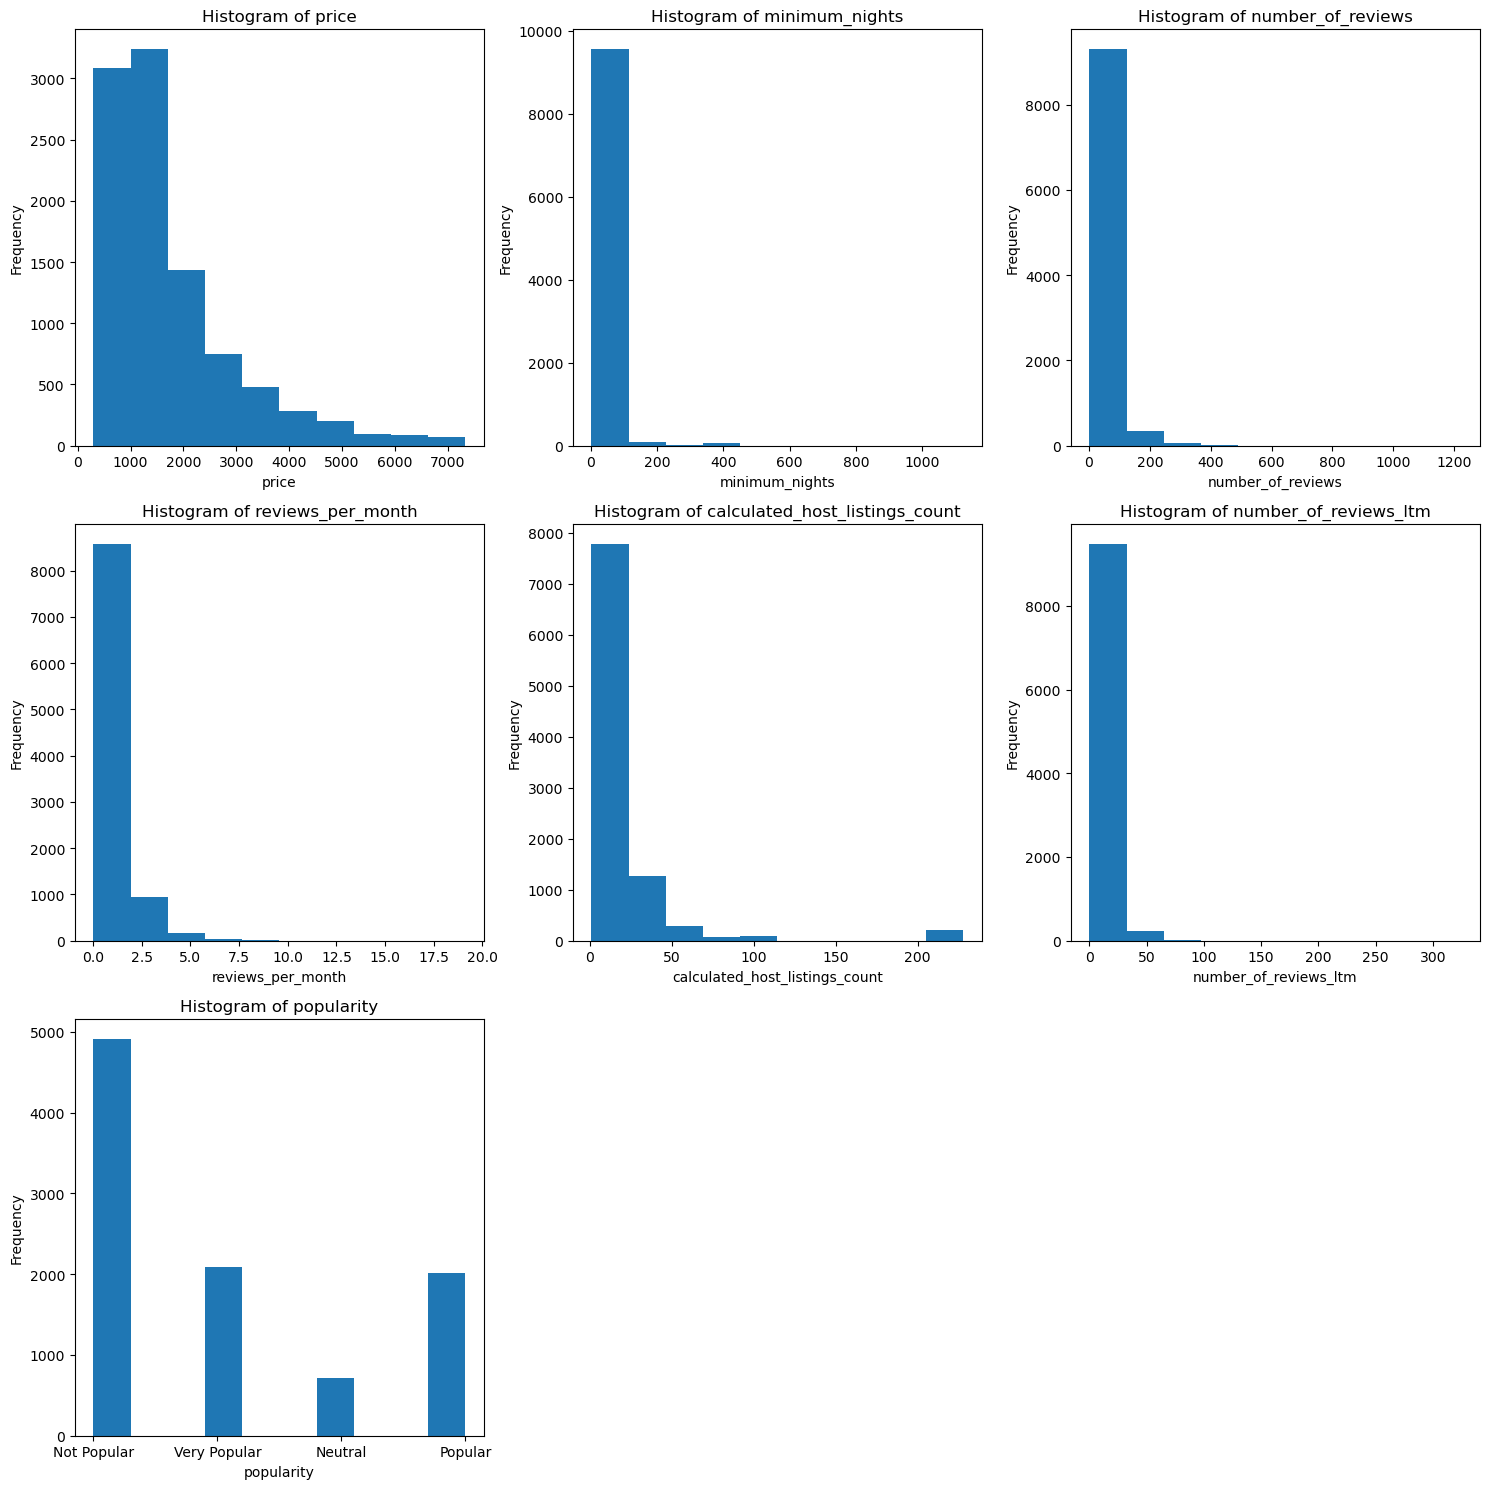

In [ ]:
# Select integer-type columns
test_histogram = df_clean_numerik

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = -(-len(test_histogram.columns) // num_cols)  # Ceiling division to ensure enough rows for all columns

# Set up subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  # Adjust figsize based on the number of rows

# Iterate over each column and plot histogram
for idx, column in enumerate(test_histogram.columns):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].hist(test_histogram[column], bins=10)
    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Remove any unused subplots
for idx in range(len(test_histogram.columns), num_rows*num_cols):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


From the histogram above, we can gain some insights:

- All the data are not normally distributed.
- Mostly, the price ranges between 250 and 1800 baht.
- The minimum_night being offered ranges from 1 to 100 nights.
- The number of reviews is mostly between 0 and 100 reviews.

##### **a. Price variables analysis**

In [ ]:
df_popular = pd.concat([avail_0_90_df,avail_91_180_df])
df_popular.head()

name host_name neighbourhood  \
9                       Standard Room Decor do Hostel    Somsak    Khlong San   
23                Contemporary Modern Duplex-Thong Lo     Shine   Khlong Toei   
38                 ICONSIAM River view  on 49th floor     Weera      Bang Rak   
50  Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok  Pichanee   Khlong Toei   
51                Chic two bedroom for Monthly rental    Phoebe      Bang Rak   

    latitude  longitude        room_type  price  minimum_nights  \
9   13.72040  100.50757     Private room    700               2   
23  13.72097  100.57823  Entire home/apt   2078              60   
38  13.72287  100.51678     Private room   2500             180   
50  13.73782  100.55179  Entire home/apt   1490               5   
51  13.72687  100.52725  Entire home/apt   2701              30   

    number_of_reviews last_review  reviews_per_month  \
9                   4  2019-12-27               0.03   
23                 83  2018-09-12               0.75   
38                 15  2015-12-08               0.14   
50                 11  2018-07-02               0.15   
51                104  2020-02-20               0.89   

    calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
9                               10                87                      0   
23                               1                55                      0   
38                               1                88                      0   
50                               1                16                      0   
51                               1                 0                      0   

      popularity  
9   Very Popular  
23  Very Popular  
38  Very Popular  
50  Very Popular  
51  Very Popular

Text(0.5, 0, 'Price in Baht')

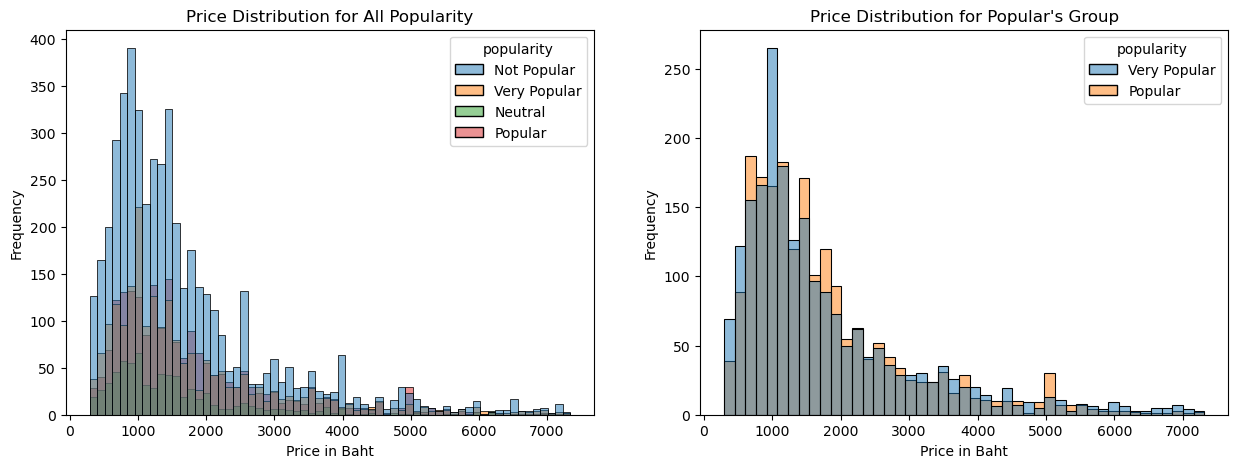

In [ ]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='popularity')
plt.title('Price Distribution for All Popularity')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='popularity')
plt.title("Price Distribution for Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

Text(0.5, 0, 'Price in Baht')

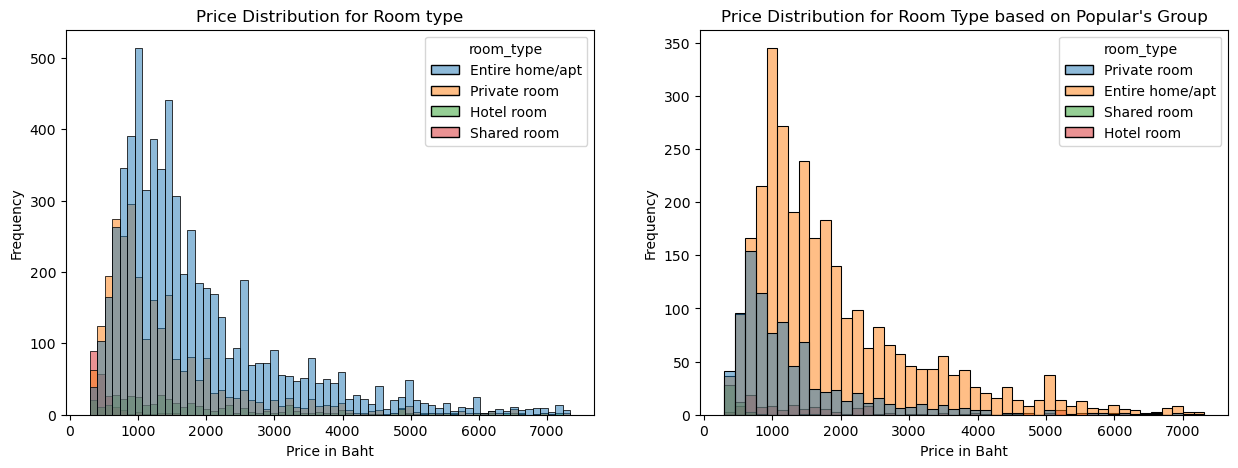

In [ ]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='room_type')
plt.title('Price Distribution for Room type')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='room_type')
plt.title("Price Distribution for Room Type based on Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

From the graph above, we can observe the following:

1. Upon comparing the Price Distribution graphs of df_clean and df_popular, it is evident that in df_clean, the majority of listings in the not-popular group fall within the price range of 600-1000 baht. Conversely, in the popular group, listings are predominantly priced between 750-1200 baht.
2. Upon analyzing the room types, it becomes clear that listings priced in the range of 750-1200 baht are mostly for entire homes/apartments. Additionally, based on popularity data, it appears that guests highly prefer staying in entire homes or apartments, even if it means paying an additional price between 800-1800 baht, as long as they can access the entire property.

##### **b. Review Analysis**


Text(0.5, 0, 'Number of Reviews')

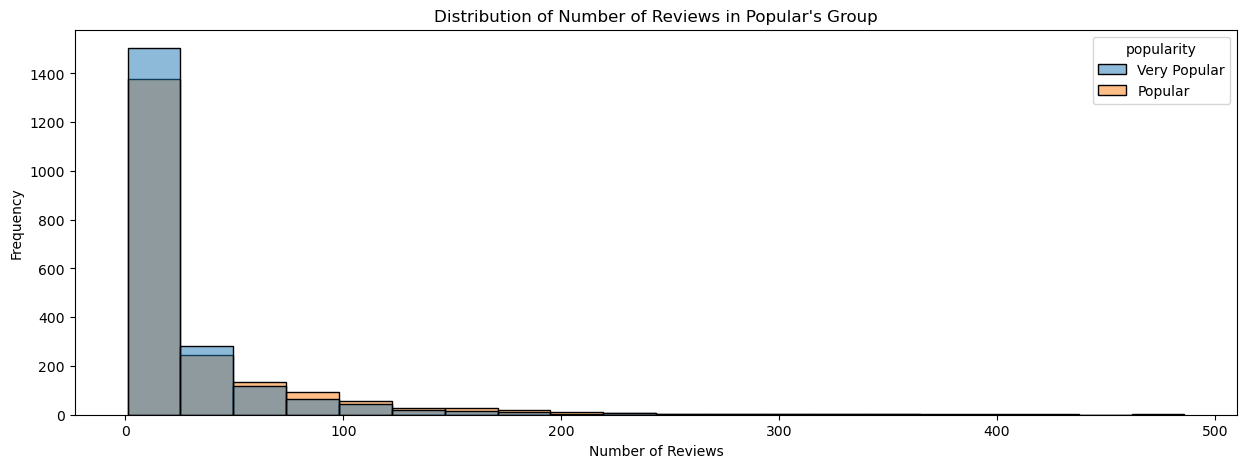

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_popular,x='number_of_reviews',hue='popularity',bins=20)
plt.title("Distribution of Number of Reviews in Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Number of Reviews')



<Axes: xlabel='number_of_reviews', ylabel='number_of_reviews_ltm'>

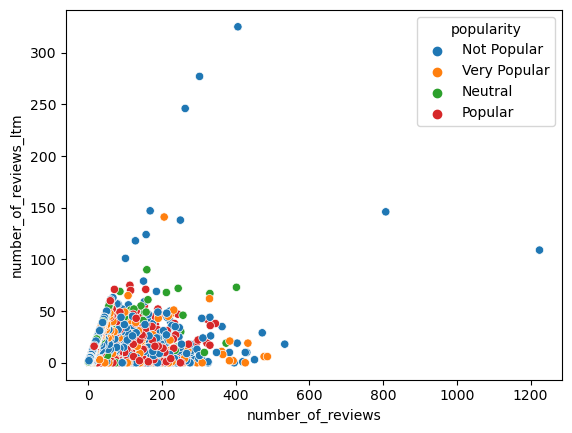

In [ ]:
sns.scatterplot(data=df_clean,x='number_of_reviews',y='number_of_reviews_ltm',hue='popularity')

<Axes: xlabel='number_of_reviews', ylabel='number_of_reviews_ltm'>

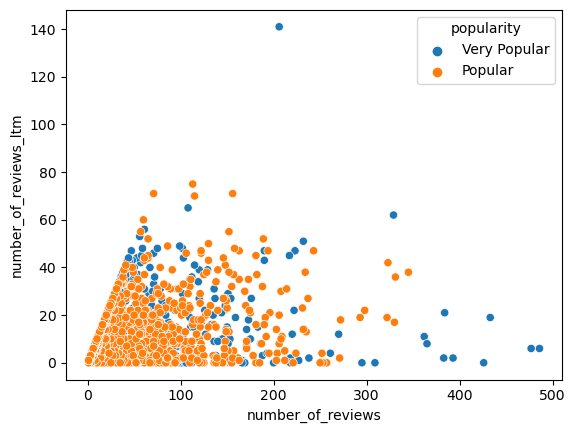

In [ ]:
sns.scatterplot(data=df_popular,x='number_of_reviews',y='number_of_reviews_ltm',hue='popularity')

From the scatterplot, we can see that review has impact to increasing traffic for host.

##### **c. Minimum Nights**

C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\4213827269.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df_clean[df['minimum_nights']<60], x='minimum_nights')


<Axes: xlabel='minimum_nights', ylabel='Count'>

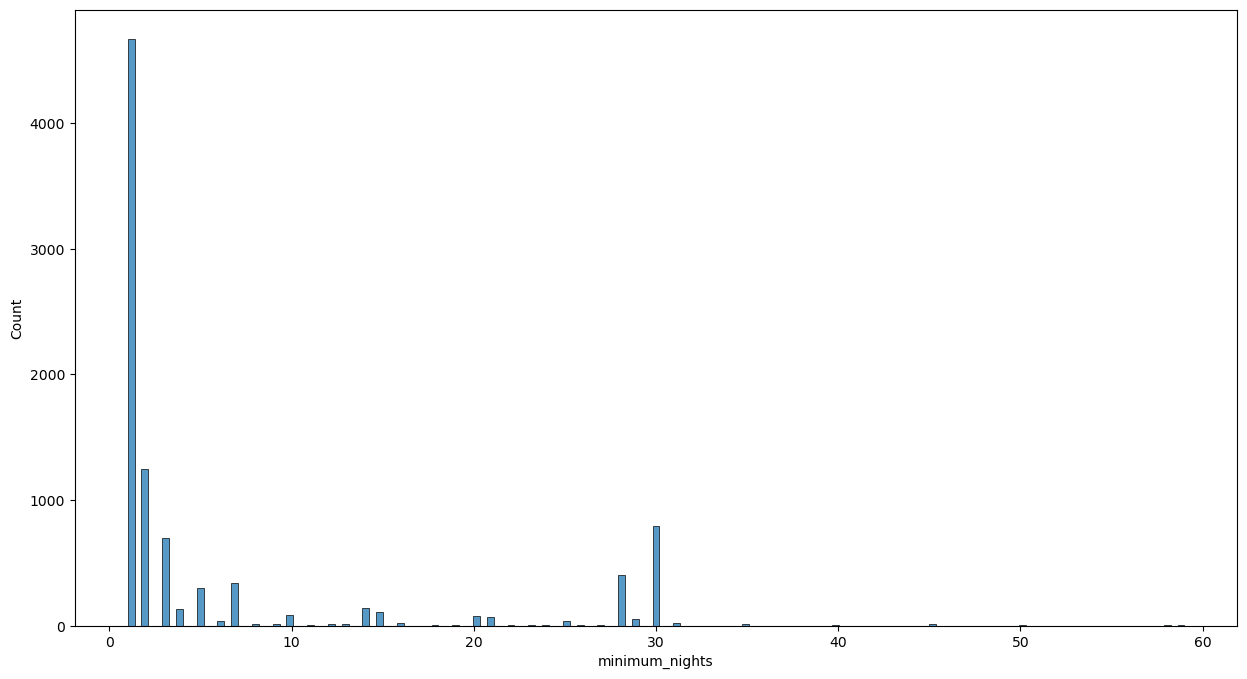

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_clean[df['minimum_nights']<60], x='minimum_nights')

C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\57431209.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=df_popular[df['minimum_nights']<61], x='minimum_nights')


<Axes: xlabel='minimum_nights', ylabel='Count'>

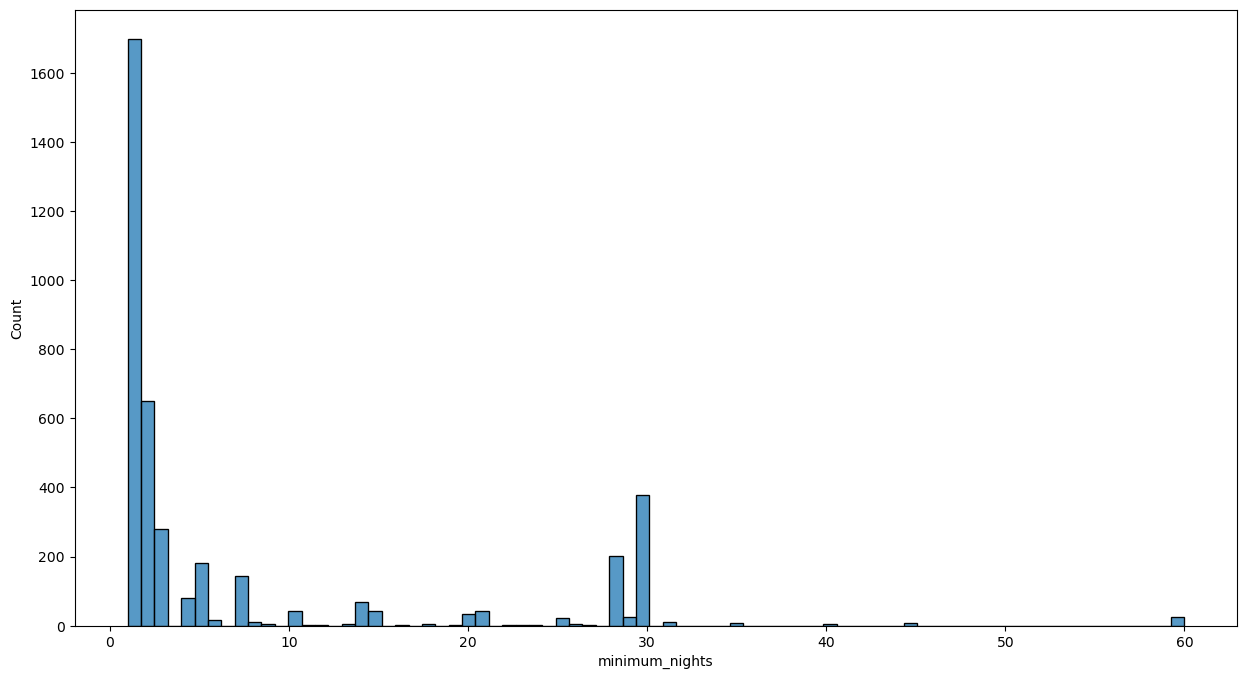

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_popular[df['minimum_nights']<61], x='minimum_nights')

We can see from this graph that the majority of guests stay for around 1-3 nights. Additionally, there appears to be demand for stays exceeding 25 nights

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Bangkok
bangkok_map = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Initialize a MarkerCluster object
marker_cluster = MarkerCluster().add_to(bangkok_map)

# Add markers for each Airbnb listing
for idx, row in df_clean.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
bangkok_map


### **2.2 ANALYSIS OF PRICE FOR OPTIMUM PROFIT**

Question: <br>
**What is the price range that remains competitive while still yielding the most optimal profit?**

Firstly, the price variable is dependent on various factors. Therefore, I would like to explore any correlations with numeric variables. Alternatively, is the price more closely related to categorical variables?

##### **2.2.1 Correlation Test for all Numeric Variables**

In [ ]:
df_numerik = df_clean[['price','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']]

In [ ]:
df_numerik.corr(method = 'spearman')

price  number_of_reviews  \
price                           1.000000           0.051598   
number_of_reviews               0.051598           1.000000   
reviews_per_month               0.158062           0.595538   
calculated_host_listings_count  0.167361           0.082758   
availability_365               -0.039386          -0.154062   
number_of_reviews_ltm           0.151712           0.508342   

                                reviews_per_month  \
price                                    0.158062   
number_of_reviews                        0.595538   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.242754   
availability_365                        -0.116929   
number_of_reviews_ltm                    0.713894   

                                calculated_host_listings_count  \
price                                                 0.167361   
number_of_reviews                                     0.082758   
reviews_per_month                                     0.242754   
calculated_host_listings_count                        1.000000   
availability_365                                     -0.001252   
number_of_reviews_ltm                                 0.227286   

                                availability_365  number_of_reviews_ltm  
price                                  -0.039386               0.151712  
number_of_reviews                      -0.154062               0.508342  
reviews_per_month                      -0.116929               0.713894  
calculated_host_listings_count         -0.001252               0.227286  
availability_365                        1.000000              -0.120653  
number_of_reviews_ltm                  -0.120653               1.000000

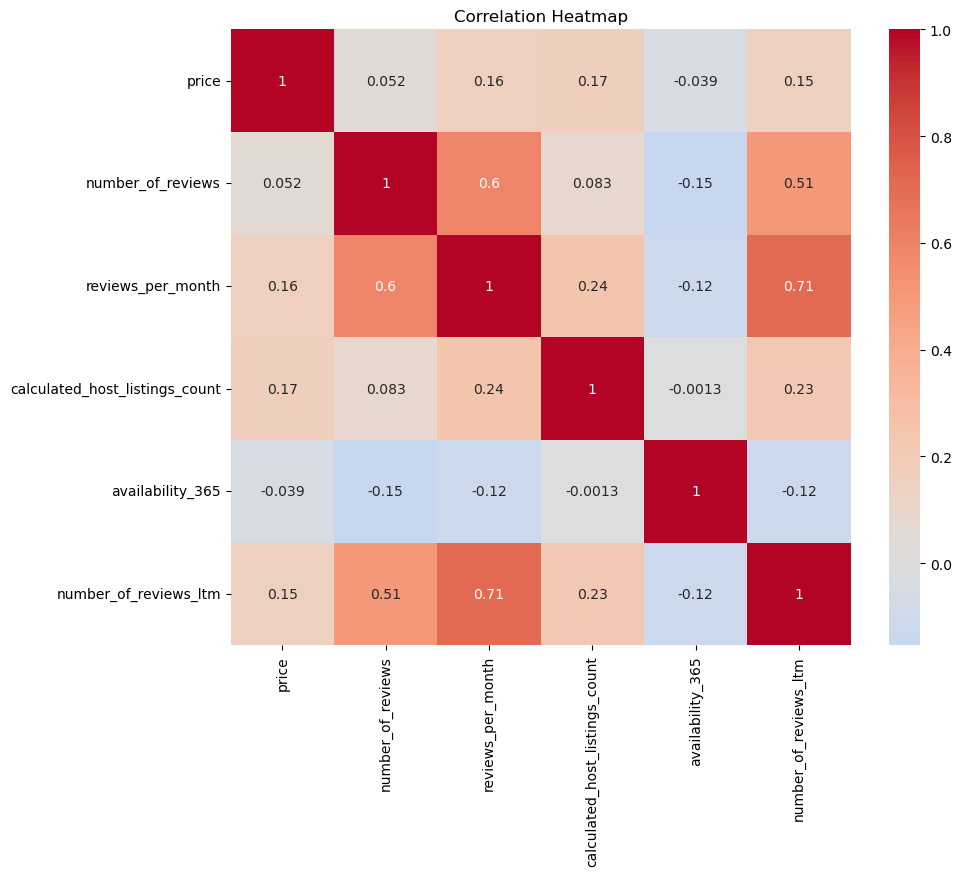

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_numerik.corr(method='spearman'),
            annot=True,   # Show correlation values on the heatmap
            cmap='coolwarm',   # Color map
            center=0)   # Mask to hide values with correlation less than 0.5

plt.title('Correlation Heatmap')
plt.show()

From the heatmap, it can be seen that the variables with relatively strong correlations are:

- Reviews_per_month & number of reviews ltm
- Number_of_reviews with number_of_reviews_ltm
- Reviews_per_month with number_of_review
- Price does not have a very strong correlation with other numeric variables. Therefore, I did not delve deeper into it.

For all the review variables and it correlation , this is easily understandable considering the interrelated nature of the variables.
- Number of reviews refers to the total number of reviews received by the host since the beginning of operations up to the time this data was collected.
- Number of reviews ltm indicates the total number of reviews received in the last 12 months.
- Reviews per month is calculated by dividing the total number of reviews by the total number of operational months.

In conducting this analysis, I primarily focused on the number of reviews and number of reviews ltm. This decision was made because:

- Reviews per month has ambiguous value since the start date of the host's operations is unknown.
- Reviews per month can be replaced by the other two variables.
- Number of reviews ltm is more capable of portraying the current situation as it encompasses data from the past 12 months, thus capturing existing trends more effectively

##### **2.2..2 Price vs Categorical Variable**

In [ ]:
df_clean

name host_name  \
0                        Nice room with superb city view    Nuttee   
3         Spacious one bedroom at The Kris Condo Bldg. 3   Sirilak   
5                         NEw Pro!!  Bungalow Bkk Centre  Wimonpak   
6                        Condo with Chaopraya River View  Athitaya   
8                     Batcave, Pool view, near Chatuchak       Nol   
...                                                  ...       ...   
15712                        ใจกลางเมืองติดห้างไอคอนสยาม       Noi   
15728      1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP     Lucas   
15743                 Vibrant Luxe 2 Bedroom | Thong Lor    Ernest   
15744                 Vibrant Luxe 2 Bedroom | Thong Lor    Ernest   
15796  Stunning river view in the heart of BKK 5min/t...      Alex   

       neighbourhood   latitude   longitude        room_type  price  \
0        Ratchathewi  13.759830  100.541340  Entire home/apt   1905   
3          Din Daeng  13.788230  100.572560     Private room   1286   
5      Bang Kho laen  13.697570  100.528800  Entire home/apt   1000   
6         Rat Burana  13.685560  100.495350     Private room   1558   
8         Chatu Chak  13.816930  100.564330  Entire home/apt   1558   
...              ...        ...         ...              ...    ...   
15712      Thon buri  13.696506  100.486226  Entire home/apt   2000   
15728    Khlong Toei  13.734856  100.557960  Entire home/apt   2514   
15743        Vadhana  13.730126  100.586369  Entire home/apt   3932   
15744        Vadhana  13.729880  100.586269  Entire home/apt   4285   
15796       Bang Rak  13.719792  100.515910  Entire home/apt   3304   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   3                 65  2020-01-06               0.50   
3                   7                  2  2022-04-01               0.03   
5                 250                 19  2017-08-03               0.17   
6                   3                  1  2014-02-03               0.01   
8                   3                 10  2016-03-29               0.09   
...               ...                ...         ...                ...   
15712               1                  1  2022-12-25               1.00   
15728               1                  1  2022-12-26               1.00   
15743               1                  3  2022-12-24               3.00   
15744              28                  3  2022-12-28               3.00   
15796               2                  2  2022-12-28               2.00   

       calculated_host_listings_count  availability_365  \
0                                   2               353   
3                                   1               323   
5                                  41               365   
6                                   1               365   
8                                   1               365   
...                               ...               ...   
15712                               2               361   
15728                               4               257   
15743                               8               349   
15744                               8               365   
15796                               3               342   

       number_of_reviews_ltm   popularity  
0                          0  Not Popular  
3                          1  Not Popular  
5                          0  Not Popular  
6                          0  Not Popular  
8                          0  Not Popular  
...                      ...          ...  
15712                      1  Not Popular  
15728                      1      Neutral  
15743                      3  Not Popular  
15744                      3  Not Popular  
15796                      2  Not Popular  

[9721 rows x 15 columns]

**Overall Price Distribution**

Text(0.5, 0, 'Price in Baht')

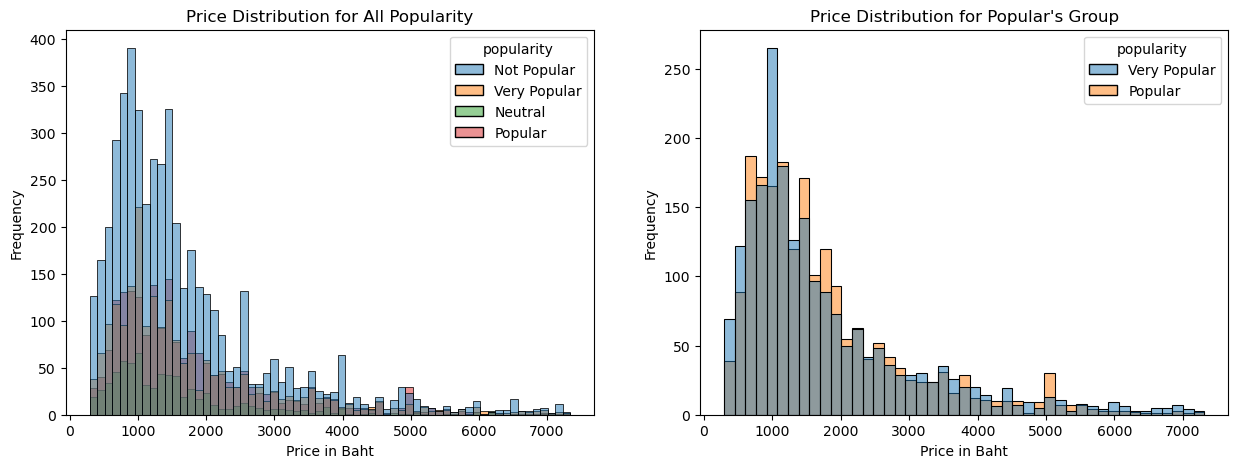

In [ ]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='popularity')
plt.title('Price Distribution for All Popularity')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='popularity')
plt.title("Price Distribution for Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

**Price Distribution for each Room Type**

Text(0.5, 0, 'Price in Baht')

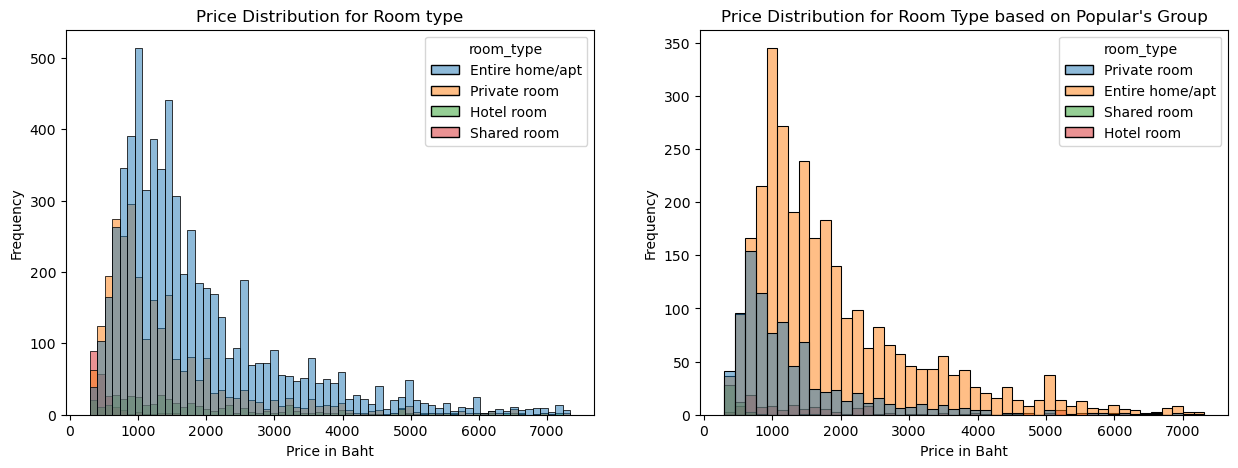

In [ ]:
plt.figure(figsize=(15,5))
# 1. Use df_clean (overall data)
plt.subplot(1,2,1)
sns.histplot(data=df_clean,x='price',hue='room_type')
plt.title('Price Distribution for Room type')
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

# 2. Focus on data that we sort based on popularity 
plt.subplot(1,2,2)
sns.histplot(data=df_popular,x='price',hue='room_type')
plt.title("Price Distribution for Room Type based on Popular's Group")
plt.ylabel('Frequency')
plt.xlabel('Price in Baht')

In [33]:
df_clean[df_clean['room_type']=='Private room']['price'].median()

1037.0

In [34]:
df_clean[df_clean['room_type']=='Entire home/apt']['price'].median()

1500.0

From the graph above, we can observe the following:

1. Upon comparing the Price Distribution graphs of df_clean and df_popular, it is evident that in df_clean, the majority of listings in the not-popular group fall within the price range of 600-1000 baht. Conversely, in the popular group, listings are predominantly priced between 750-1200 baht.
2. Upon analyzing the room types, it becomes clear that listings priced in the range of 750-1200 baht are mostly for entire homes/apartments. Additionally, based on popularity data, it appears that guests highly prefer staying in entire homes or apartments, even if it means paying an additional price between 800-1800 baht, as long as they can access the entire property.
3. The room type also affects the price. This is evident from the frequency and because entire homes/apartments usually have more than one room.

**Price vs Neighbourhood**

The analysis of price and neighborhood has already been conducted in line 21, along with some additional analysis. In this section, I will provide further conclusions.

C:\Users\Intania\AppData\Local\Temp\ipykernel_14780\1445729248.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)


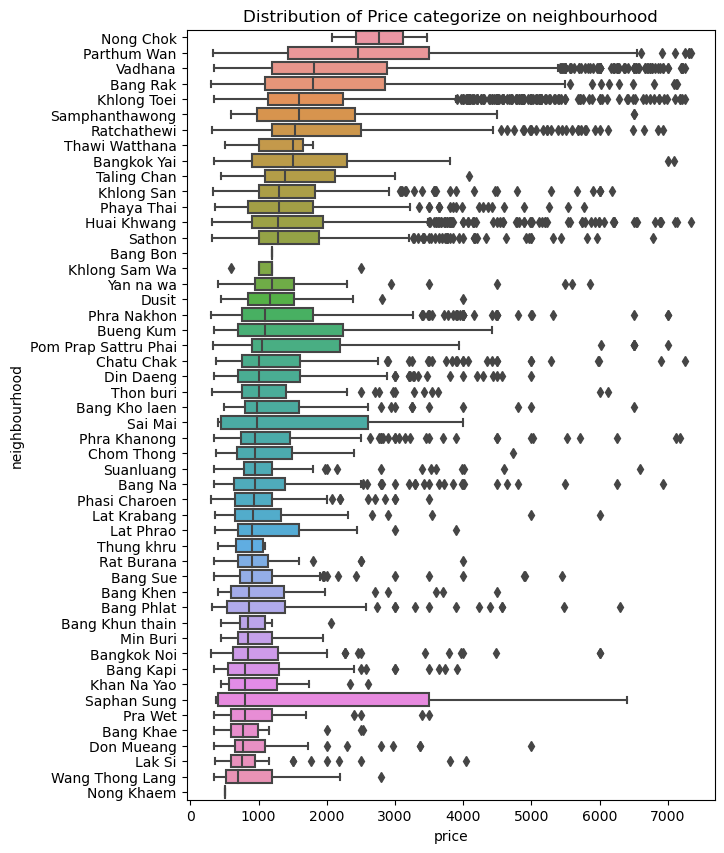

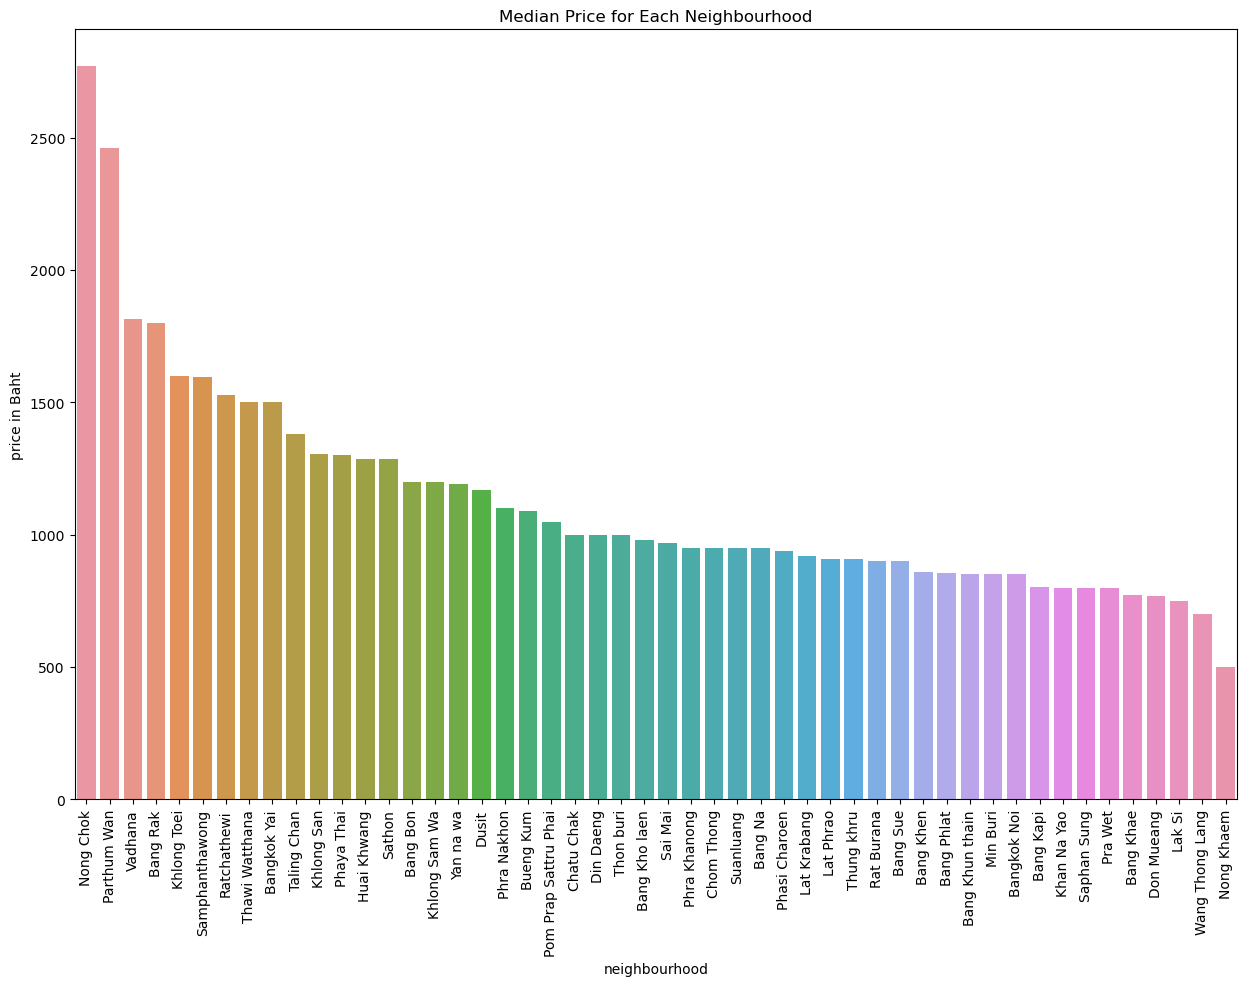

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
median_prices = df_clean.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

# Create boxplot 
sns.boxplot(data = df_clean,
            x = 'price',     
            y = 'neighbourhood',
            order=median_prices.index
            )   

# Add title to the graph
plt.title('Distribution of Price categorize on neighbourhood')

# -------------------------------------------------------------------------------------------
plt.figure(figsize=(15, 10))
sns.barplot(data=df_clean, x='neighbourhood', y='price', ci=0, estimator='median', order=median_prices.index)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Median Price for Each Neighbourhood')
plt.ylabel('price in Baht')
plt.show()

In [ ]:
neighborhood_price_distributions = {}

for name, group in df_clean.groupby('neighbourhood'):
    neighborhood_price_distributions[name] = group['price']

In [ ]:
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(*neighborhood_price_distributions.values())
p_value

4.5902504735248597e-212

In [ ]:
df.groupby('neighbourhood')[['number_of_reviews']].sum().sort_values(by='number_of_reviews', ascending=False).head(10)

number_of_reviews
neighbourhood                   
Khlong Toei                41281
Vadhana                    37415
Sathon                     22242
Ratchathewi                20698
Huai Khwang                18145
Bang Rak                   17654
Phaya Thai                 13659
Parthum Wan                 9103
Chatu Chak                  8218
Phra Nakhon                 8142

The price varies across different neighborhoods. As shown in the group table above, we can observe that the neighborhood has an impact on the price. The more popular the neighborhood, the more varied its prices, allowing hosts to set higher prices.

**Statistic Test to know if host name has impact to price**

In [ ]:
group_hostName_price = df_clean.groupby(by='host_name')[['price']].median()
prices = list(group_hostName_price['price'].values)
prices

[1529.0,
 7000.0,
 1025.0,
 830.0,
 1139.0,
 1329.0,
 1863.0,
 741.5,
 1038.0,
 1585.5,
 1905.0,
 1942.5,
 1380.0,
 1300.0,
 1712.0,
 3185.0,
 1402.0,
 6206.0,
 2000.0,
 1200.0,
 750.0,
 984.0,
 800.0,
 2550.0,
 1500.0,
 1600.0,
 999.0,
 911.0,
 1487.0,
 3707.0,
 599.0,
 3647.5,
 1500.0,
 1100.0,
 1117.0,
 2500.0,
 3243.0,
 1267.0,
 1720.0,
 1200.0,
 645.0,
 500.0,
 540.0,
 866.0,
 1000.0,
 382.0,
 1150.0,
 1365.0,
 1600.0,
 1202.5,
 2150.0,
 1305.0,
 1441.0,
 920.0,
 1500.0,
 680.0,
 1050.0,
 999.0,
 416.0,
 675.0,
 1800.0,
 390.0,
 550.0,
 1000.0,
 6500.0,
 6137.0,
 1390.0,
 1899.0,
 5900.0,
 1032.0,
 3500.0,
 990.0,
 1039.5,
 560.0,
 1143.0,
 1500.0,
 3500.0,
 1800.0,
 750.0,
 3740.0,
 774.0,
 1558.0,
 2200.0,
 1576.5,
 2200.0,
 1709.0,
 646.0,
 2281.0,
 759.5,
 2061.0,
 2400.0,
 3441.5,
 1500.0,
 3097.0,
 1100.0,
 2770.0,
 920.0,
 934.0,
 5500.0,
 2000.0,
 772.0,
 504.0,
 775.0,
 1007.0,
 6000.0,
 1465.0,
 3643.0,
 1080.0,
 3500.0,
 2214.0,
 900.0,
 1550.0,
 2000.0,
 2000.0,
 4555.

In [ ]:
from scipy.stats import kruskal


stat, pvalue = kruskal(
    *prices
)

pvalue

0.4966634570611946

The value is greater than 0.05, indicating that the host name has no correlation with the price. It can be concluded that the price is associated with the type of room and location.

# **CONCLUSION**

After conducting thorough analysis, here are the key conclusions drawn and actionable insights:



1. Location plays a significant role in traffic. It's advisable to target areas with high footfall. Expanding business ventures in popular locations, especially those near public transportation, is highly recommended.

2. Our customers show a strong preference for renting entire houses/apartments and are willing to pay premium prices to match the value offered by hosts.

3. Host reputation is paramount. Being accommodating and responsive is crucial. In times of overwhelm, collaborating with reputable hosts who are open to managing additional properties is a viable option.

4. Recommended price ranges vary by neighborhood. For specific pricing information in your area, please refer to our dashboard by clicking the link below:

    - Entire home/apartment: 800-1400 Baht
    - Private Room: 800-1000 Baht
    - Shared Room: under 500 Baht
    - Hotel: 800-1500 Baht (Hotels have varying prices based on factors like star rating, brand, etc.)
    
5. Review also play important role to boost your visibility and reputation

In [ ]:
df_clean[(df_clean['neighbourhood']=='Bang Bon')]

name host_name  \
8592  wonderful room 5G 好房清洁 可住 特价 Book now don't Miss       Bob   

     neighbourhood  latitude  longitude        room_type  price  \
8592      Bang Bon  13.64895  100.40523  Entire home/apt   1200   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
8592              14                  1  2019-09-30               0.03   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
8592                               2               365                      0   

       popularity  
8592  Not Popular